# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [0]:
import numpy as np



archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat' #aca se sube el archivo que contiene los datos de las estrellas
datos = np.loadtxt(archivo) #se lee el archivo y sus datos se guardan en un arreglo 
print('Forma:\n{}'.format(datos.shape)) #forma del archivo
print('Tamaño:\n{}'.format(datos.size)) #tamaño del archivo
from random import * 


# Inspecciona su forma y tamaño

Forma:
(5298, 7)
Tamaño:
37086


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

Text(0.5,1,'Histograma de distribucion de distancias en kpc')

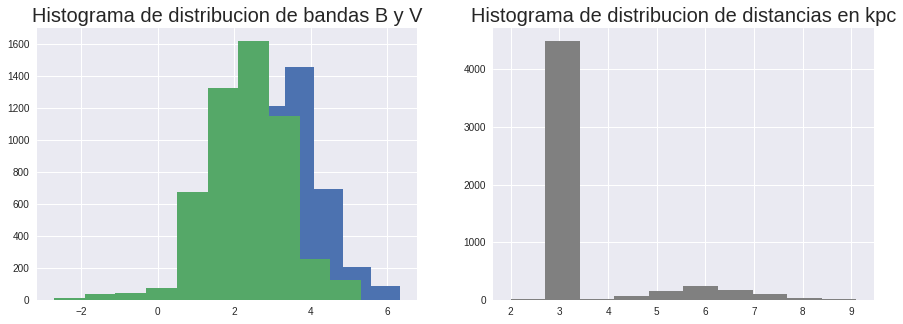

In [0]:
#Plotear histogramas de cada columna

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize = (15,5), ncols = 2) #se crean las figuras en donde se colocaran los graficos
magnitud_B = datos[:,0].copy() #estas son copias de los datos sobre B y V
magnitud_V = datos[:,1].copy()
distancias = datos[:,-1].copy()
masas = datos[:,6].copy()
temperatura = datos[:,5].copy()
ax[0].hist(magnitud_B) #Se graficarán la distribucion de datos mediante un histograma
ax[0].hist(magnitud_V)
ax[0].set_title('Histograma de distribucion de bandas B y V',fontsize=20) #titulo del primer grafico (me imagino que en un histograma el eje X e Y no llevan nombre(?))

ax[1].hist(distancias,color='gray')
ax[1].set_title('Histograma de distribucion de distancias en kpc',fontsize=20)




## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [23]:
#Filtrar por distancia

datos_filtrados = distancias.copy()<4 #Se aplica el filtro a las distancias de las estrellas 
masas = masas[datos_filtrados]
temperatura = temperatura[datos_filtrados]
magnitud_B = magnitud_B[datos_filtrados]#Se toman los valores de las bandas respectivas a las distancias que cumplen con la condicion
magnitud_V = magnitud_V[datos_filtrados]
distancias = distancias[datos_filtrados]




  
  
  
  


print()

()


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
#Funcion mag_abs(mag, dist)
#La funcion toma la magnitud aparante de una banda y las distancias para transformar la magnitud aparente en una magnitud absoluta mediante una formula, retorna un nuevo arreglo que es
#la magnitud absoluta
def mag_abs(mag_ap, dist):
  distancia_parsec = dist*1000 #transformandolo en parsec #la funcion lo pide en parsec y los datos estan en kiloparsec
  magnitud_absoluta = mag_ap - (np.log(distancia_parsec))*5 + 5
  return magnitud_absoluta
a = mag_abs(magnitud_B,distancias) #probando la funcion sin assert
  
  
    


## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

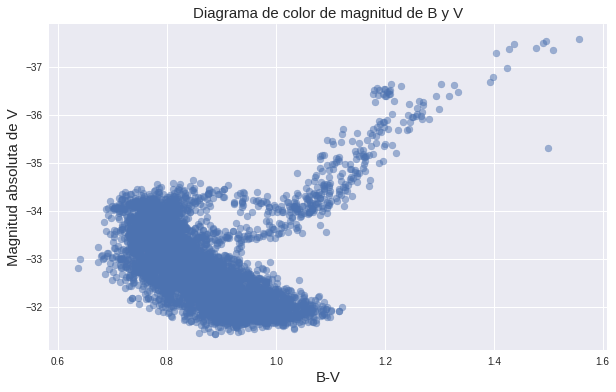

In [0]:
#Crear arrays MV y color
mv = mag_abs(magnitud_V,distancias) # se crea un arreglo de la magnitud absoluta de la banda V 
color = magnitud_B - magnitud_V 
fig, ax = plt.subplots(figsize = (10,6)) #se crea figura
cb = ax.scatter(color, mv,alpha=0.5) #se aplica el grafico de mv vs color
ax.invert_yaxis()
ax.legend()
ax.set_ylabel('Magnitud absoluta de V',fontsize = 15) #Se ponen nombres al eje X, Y y el titulo
ax.set_xlabel('B-V',fontsize = 15)
ax.set_title('Diagrama de color de magnitud de V',fontsize = 15)
ax.legend()





#plot cmd


## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

Text(0.5,1,'Histograma 2D de CDM de V y el color')

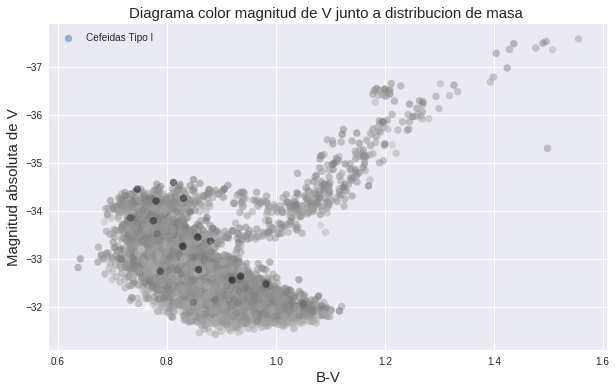

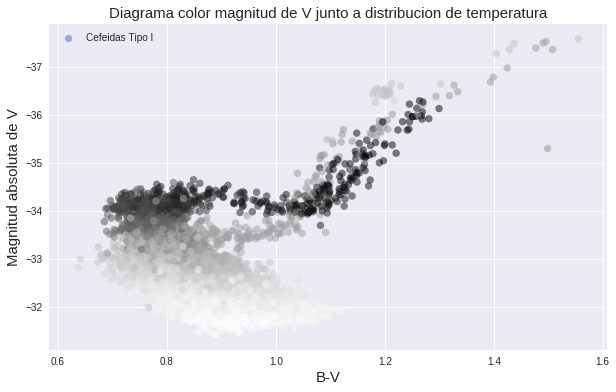

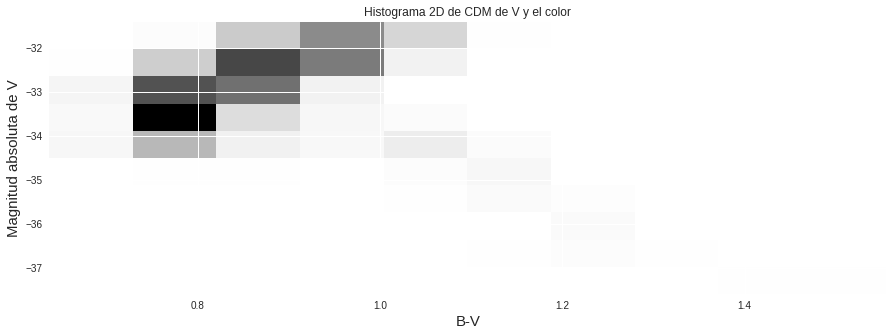

In [22]:
#basicamente aca se hace lo mismo que arriba pero agregando una nueva variable al grafico que será representada mediante una variacion de colores en el grafico
fig, ax = plt.subplots(figsize = (10,6))

cb = ax.scatter(color, mv, label = 'Cefeidas Tipo I', c = masas , alpha = 0.5)

ax.invert_yaxis()
ax.legend()
ax.set_ylabel('Magnitud absoluta de V',fontsize = 15)
ax.set_xlabel('B-V',fontsize = 15)
ax.set_title('Diagrama color magnitud de V junto a distribucion de masa ',fontsize = 15) #se agrega la distribucion de masa al grafico
ax.legend()


#el codigo siguiente es, nuevamente, analogo

fig, bx = plt.subplots(figsize = (10,6))
db = bx.scatter(color, mv, label = 'Cefeidas Tipo I', c = temperatura , alpha = 0.5)
bx.invert_yaxis()
bx.legend()
bx.set_ylabel('Magnitud absoluta de V',fontsize = 15)
bx.set_xlabel('B-V',fontsize = 15)
bx.set_title('Diagrama color magnitud de V junto a distribucion de temperatura',fontsize = 15) #se agrega la distribucion de temperaturaa
bx.legend()
#aca se crea el histograma 2D
fig, cx = plt.subplots(figsize = (15,5))
plt.hist2d(color,mv) #histograma con variables color y magnitud absoluta de V
cx.set_ylabel('Magnitud absoluta de V',fontsize = 15) #se ponen los respectivos nombres y titulos
cx.set_xlabel('B-V',fontsize = 15)
cx.set_title('Histograma 2D de CDM de V y el color')

In [0]:
# plot cmd hist2D